In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from scipy.special import rel_entr
from scipy.stats import entropy
import scipy.stats
import math
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
# 使用GPU
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
! nvidia-smi

Tue Aug  2 12:33:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.129.06   Driver Version: 470.129.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 26%   34C    P8    19W / 260W |     22MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 25%   

# Scattor plot

AGR：Relative Patent Growth (y軸)  
Relative Technology Share (x軸)

In [4]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

## DE

In [27]:
cpc=["H04\n-ELECTRIC COMMUNICATION TECHNIQUE","G06","H01\n-BASIC ELECTRIC ELEMENTS","G01","A61","Y02","G08","B60","G05","H03\n-BASIC ELECTRONIC CIRCUITRY"]
y = [186,136,663,143,74,90,183,424,88,657]
x = [0.443764346,0.224833315,0.092906329,0.036506722,0.019674281,0.027762597,0.019674281,0.074543666,0.025685867,0.034648595]

In [28]:
y=NormalizeData(y)
x=NormalizeData(x)

In [29]:
y_1 = np.percentile(y, 33) 
y_2 = np.percentile(y, 66) 
x_1 = np.percentile(x, 33) 
x_2 = np.percentile(x, 66) 

Text(0, 0.5, 'Relative Patent Groeth')

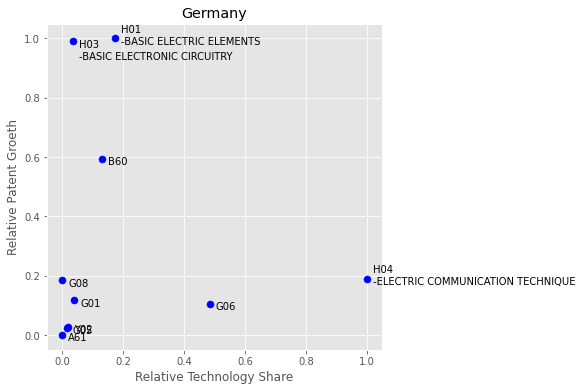

In [30]:
plt.figure(figsize=(6,6))

plt.style.use('ggplot')
    
plt.scatter(x, y, c ="blue",s = 50)

for i, txt in enumerate(cpc):
    if i != 9:
        plt.text(x[i]+0.02, y[i]-0.02,txt)
    else:
        pass
    
plt.text(x[9]+0.02, y[9]-0.06,txt)

# plt.axhline(y_1, color = 'red')
# plt.axhline(y_2, color = 'red')
# plt.axvline(x_1, color = 'red')
# plt.axvline(x_2, color = 'red')

plt.title('Germany')
plt.xlabel('Relative Technology Share')
plt.ylabel('Relative Patent Groeth')

## CN

In [31]:
cpc=["H04\n-ELECTRIC COMMUNICATION TECHNIQUE","G06","H01","G01","A61","Y02","G08","B60","G05","H03\n-BASIC ELECTRONIC CIRCUITRY"]
y=[120,158,589,133,46,75,119,184,147,720]
x=[0.625028198,0.142846094,0.044665588,0.050769241,0.02236502,0.04099824,0.032670976,0.01182059,0.020766598,0.008069454]

In [32]:
y=NormalizeData(y)
x=NormalizeData(x)

In [33]:
y_1 = np.percentile(y, 33) 
y_2 = np.percentile(y, 66) 
x_1 = np.percentile(x, 33) 
x_2 = np.percentile(x, 66) 

Text(0, 0.5, 'Relative Patent Groeth')

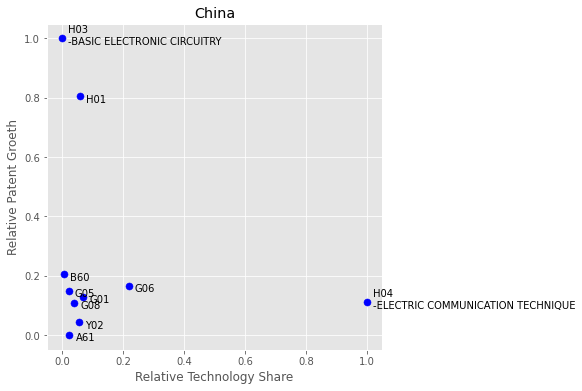

In [35]:
plt.figure(figsize=(6,6))

plt.style.use('ggplot')
    
plt.scatter(x, y, c ="blue",s = 50)

for i, txt in enumerate(cpc):
    plt.text(x[i]+0.02, y[i]-0.02,txt)
    
# plt.axhline(y_1, color = 'red')
# plt.axhline(y_2, color = 'red')
# plt.axvline(x_1, color = 'red')
# plt.axvline(x_2, color = 'red')

plt.title('China')
plt.xlabel('Relative Technology Share')
plt.ylabel('Relative Patent Groeth')

## US

In [36]:
cpc=["H04\n-ELECTRIC COMMUNICATION TECHNIQUE","G06","H01","G01","A61","Y02","G08","B60","G05\n-CONTROLLING; REGULATING","H03"]
y=[131,158,154,101,57,127,112,76,162,148]
x=[0.611818771,0.222262181,0.047594079,0.023603501,0.023016021,0.012842193,0.013984209,0.015892145,0.012427663,0.016559237]

In [37]:
y=NormalizeData(y)
x=NormalizeData(x)

In [38]:
y_1 = np.percentile(y, 33) 
y_2 = np.percentile(y, 66) 
x_1 = np.percentile(x, 33) 
x_2 = np.percentile(x, 66) 

Text(0, 0.5, 'Relative Patent Groeth')

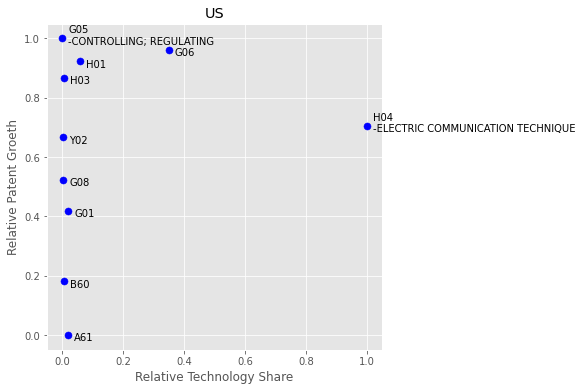

In [40]:
plt.figure(figsize=(6,6))

plt.style.use('ggplot')


plt.scatter(x, y, c ="blue",s = 50)

for i, txt in enumerate(cpc):
    plt.text(x[i]+0.02, y[i]-0.02,txt)

# plt.axhline(y_1, color = 'red')
# plt.axhline(y_2, color = 'red')
# plt.axvline(x_1, color = 'red')
# plt.axvline(x_2, color = 'red')

plt.title('US')
plt.xlabel('Relative Technology Share')
plt.ylabel('Relative Patent Groeth')